In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Import modules
%matplotlib inline

#handling data
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter

#handling information
import re
import json

#handling plots
import matplotlib.pyplot as plt
import seaborn as sns

#for network creation
import networkx as nx
from itertools import chain

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from nltk.corpus import stopwords
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_distances


from networkx.utils import py_random_state
from networkx.utils import groups
from collections import Counter


from sklearn.utils.extmath import randomized_svd
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.metrics.cluster import normalized_mutual_info_score
from datetime import datetime, timedelta

from ast import literal_eval
from pathlib import Path

In [ ]:
file = Path('/content/drive/My Drive/tweet_data_new.json')  # path to file
with file.open('r', encoding='utf-8') as f:  # open the file
    rows = [literal_eval(row) for row in f.readlines()]  # list comprehension to convert each row back to a dict

In [ ]:
tweets_org_df = pd.DataFrame(rows)

In [ ]:
tweets_org_df['created_date'] =  tweets_org_df['created_at'].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S %z %Y").strftime('%m/%d/%y %H:%M:%S'))
tweets_org_df = tweets_org_df.sort_values(by="created_date").reset_index()

In [ ]:
# Get the user mentions 
def get_usermentions_sample(tweets_df):
    tweets_handle= pd.DataFrame(tweets_df["final_entities"].apply(lambda x: pd.DataFrame(x["user_mentions"]) if x["user_mentions"] else pd.DataFrame({"screen_name" : 'null',"name" : 'null',"id" : 'null',"id_str" : 'null',"indices" : 'null'}, index=[0])))
    tweets_handle_mention_id = tweets_handle["final_entities"].apply(lambda x : [x["id"]])
    tweets_handle_mention_name = tweets_handle["final_entities"].apply(lambda x : [x["screen_name"]])
    tweets_handle_user_id = tweets_df["user"].apply(lambda x: x["id"])
    tweets_handle_1 = pd.DataFrame({"tweet_id":tweets_df["id"],"final_text":tweets_df["final_text"],"tweets_handle_user_id":tweets_handle_user_id,"user_mention_id": tweets_handle_mention_id,"user_mention_name": tweets_handle_mention_name})
    tweets_handle = pd.DataFrame({ "tweet_id": np.repeat(tweets_handle_1.tweet_id.values, 
                                    [len(x) for x in (chain.from_iterable(tweets_handle_1.user_mention_id))]),
                      "final_text": np.repeat(tweets_handle_1.final_text.values, 
                                    [len(x) for x in (chain.from_iterable(tweets_handle_1.user_mention_id))]),
                      "tweets_handle_user_id": np.repeat(tweets_handle_1.tweets_handle_user_id.values, 
                                    [len(x) for x in (chain.from_iterable(tweets_handle_1.user_mention_id))]),
                     "user_mention_id": list(chain.from_iterable(chain.from_iterable(tweets_handle_1.user_mention_id))),
                     "user_mention_name": list(chain.from_iterable(chain.from_iterable(tweets_handle_1.user_mention_name)))})
    tweets_handle = tweets_handle[tweets_handle.user_mention_id != 'null']
    tweets_handle_1 = tweets_handle_1[tweets_handle_1.astype(str)['user_mention_id'] != '[0    null\nName: id, dtype: object]']
    return tweets_handle, tweets_handle_1


In [ ]:
# Get the hashtag
def get_hashtag_sample(tweets_df):
    tweets_hashtag= pd.DataFrame(tweets_df["final_entities"].apply(lambda x: pd.DataFrame(x["hashtags"]) if x["hashtags"] else pd.DataFrame({"text" : 'null',"indices" : 'null'}, index=[0])))
    tweets_hashtag_name = tweets_hashtag["final_entities"].apply(lambda x : [x["text"]])
    tweets_hashtag = pd.DataFrame({"tweet_id":tweets_df["id"],"tweets_hashtag_name":tweets_hashtag_name})
    return tweets_hashtag

In [ ]:
# Lastly fill the new dataframe with the important information
def fill_df(tweets_df):
    tweets_handle, tweets_handle_1 =  get_usermentions_sample(tweets_df)
    tweets_hashtag = get_hashtag_sample(tweets_df)
    return tweets_handle, tweets_handle_1, tweets_hashtag

In [ ]:
# Get the interactions between the different users
def get_interactions_usermention(row):
    
    # The interactions are going to be a set of tuples
    interactions = set()
    interactions.add((row["tweet_id"],row["tweets_handle_user_id"], row["user_mention_id"]))
    # Discard all not existing values
    interactions.discard((None, None))
    # Return user and interactions
    return interactions

In [ ]:
start_time = datetime.strptime(tweets_org_df['created_at'][0], "%a %b %d %H:%M:%S %z %Y").strftime('%m/%d/%y %H:%M:%S')
end_time = datetime.strptime(tweets_org_df['created_at'][len(tweets_org_df)-1], "%a %b %d %H:%M:%S %z %Y").strftime('%m/%d/%y %H:%M:%S')
topic_evn_cluster = []

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

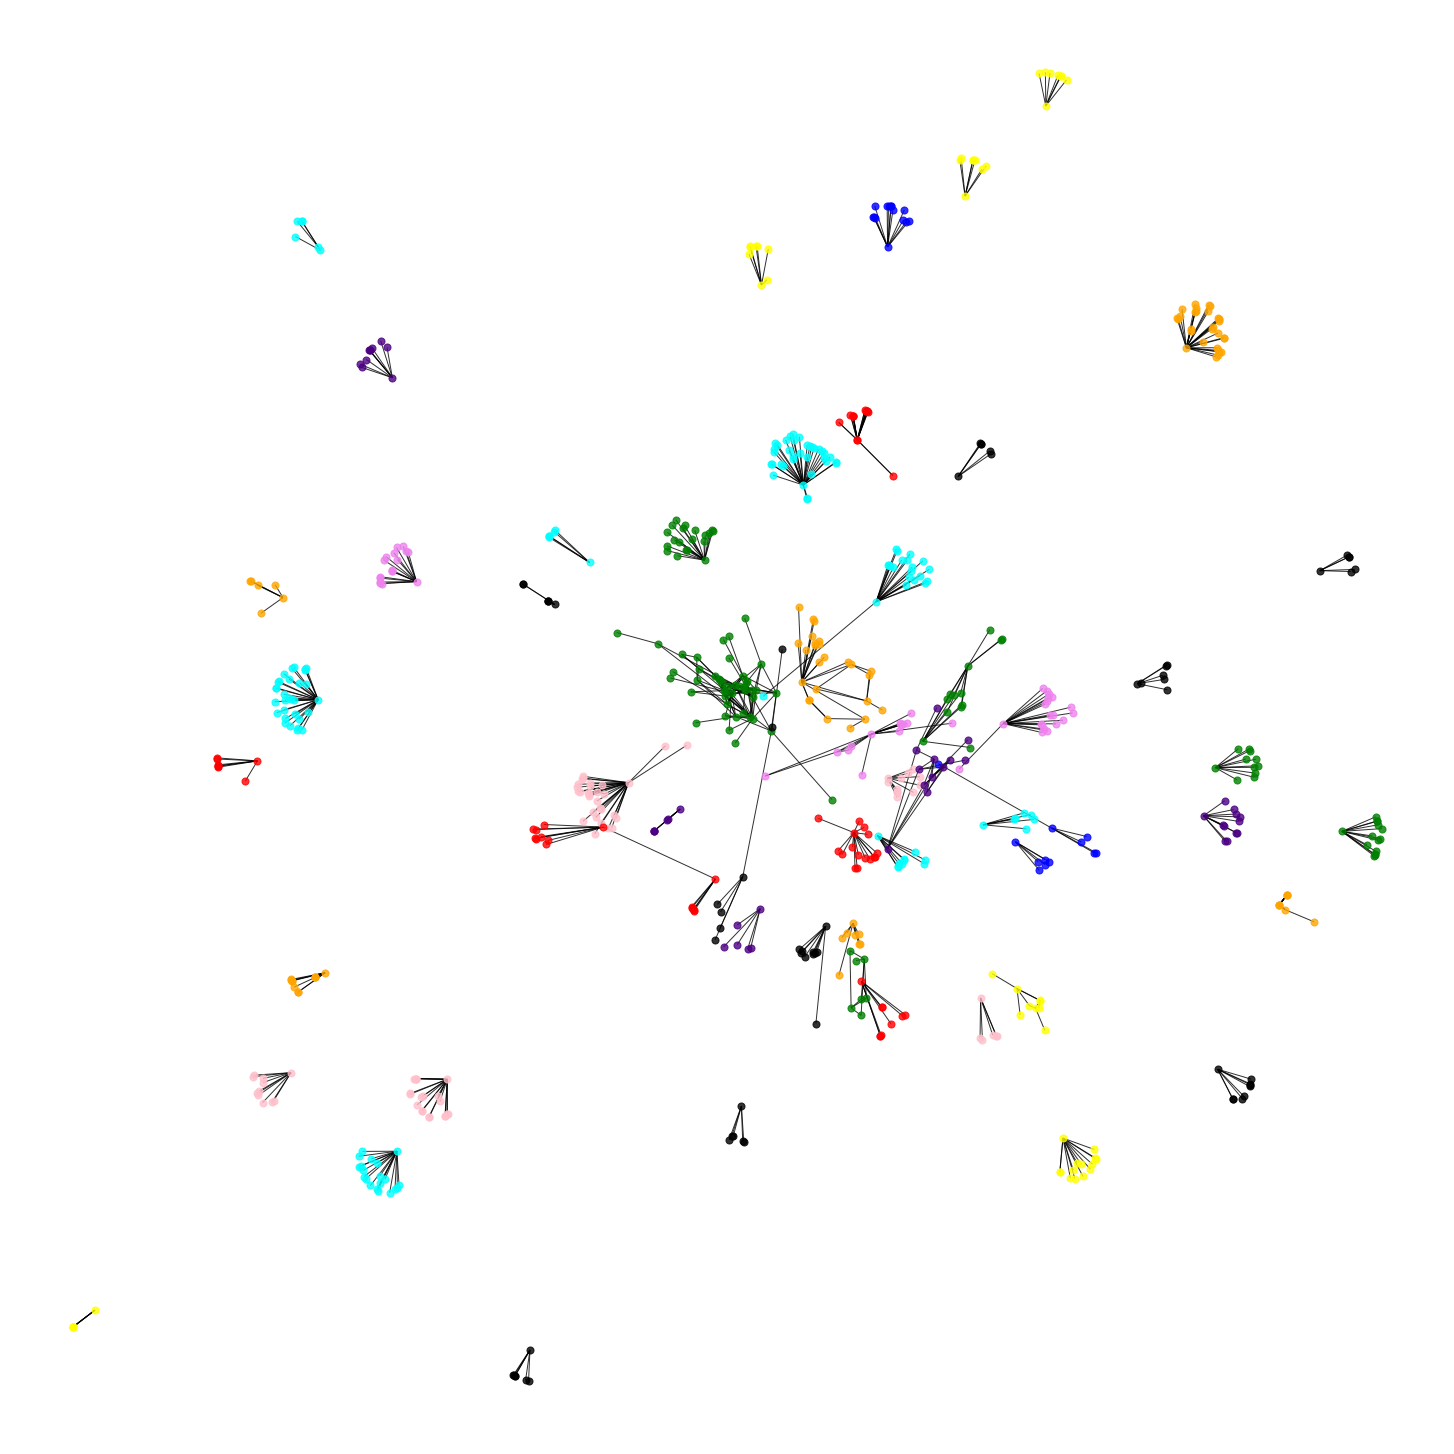

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

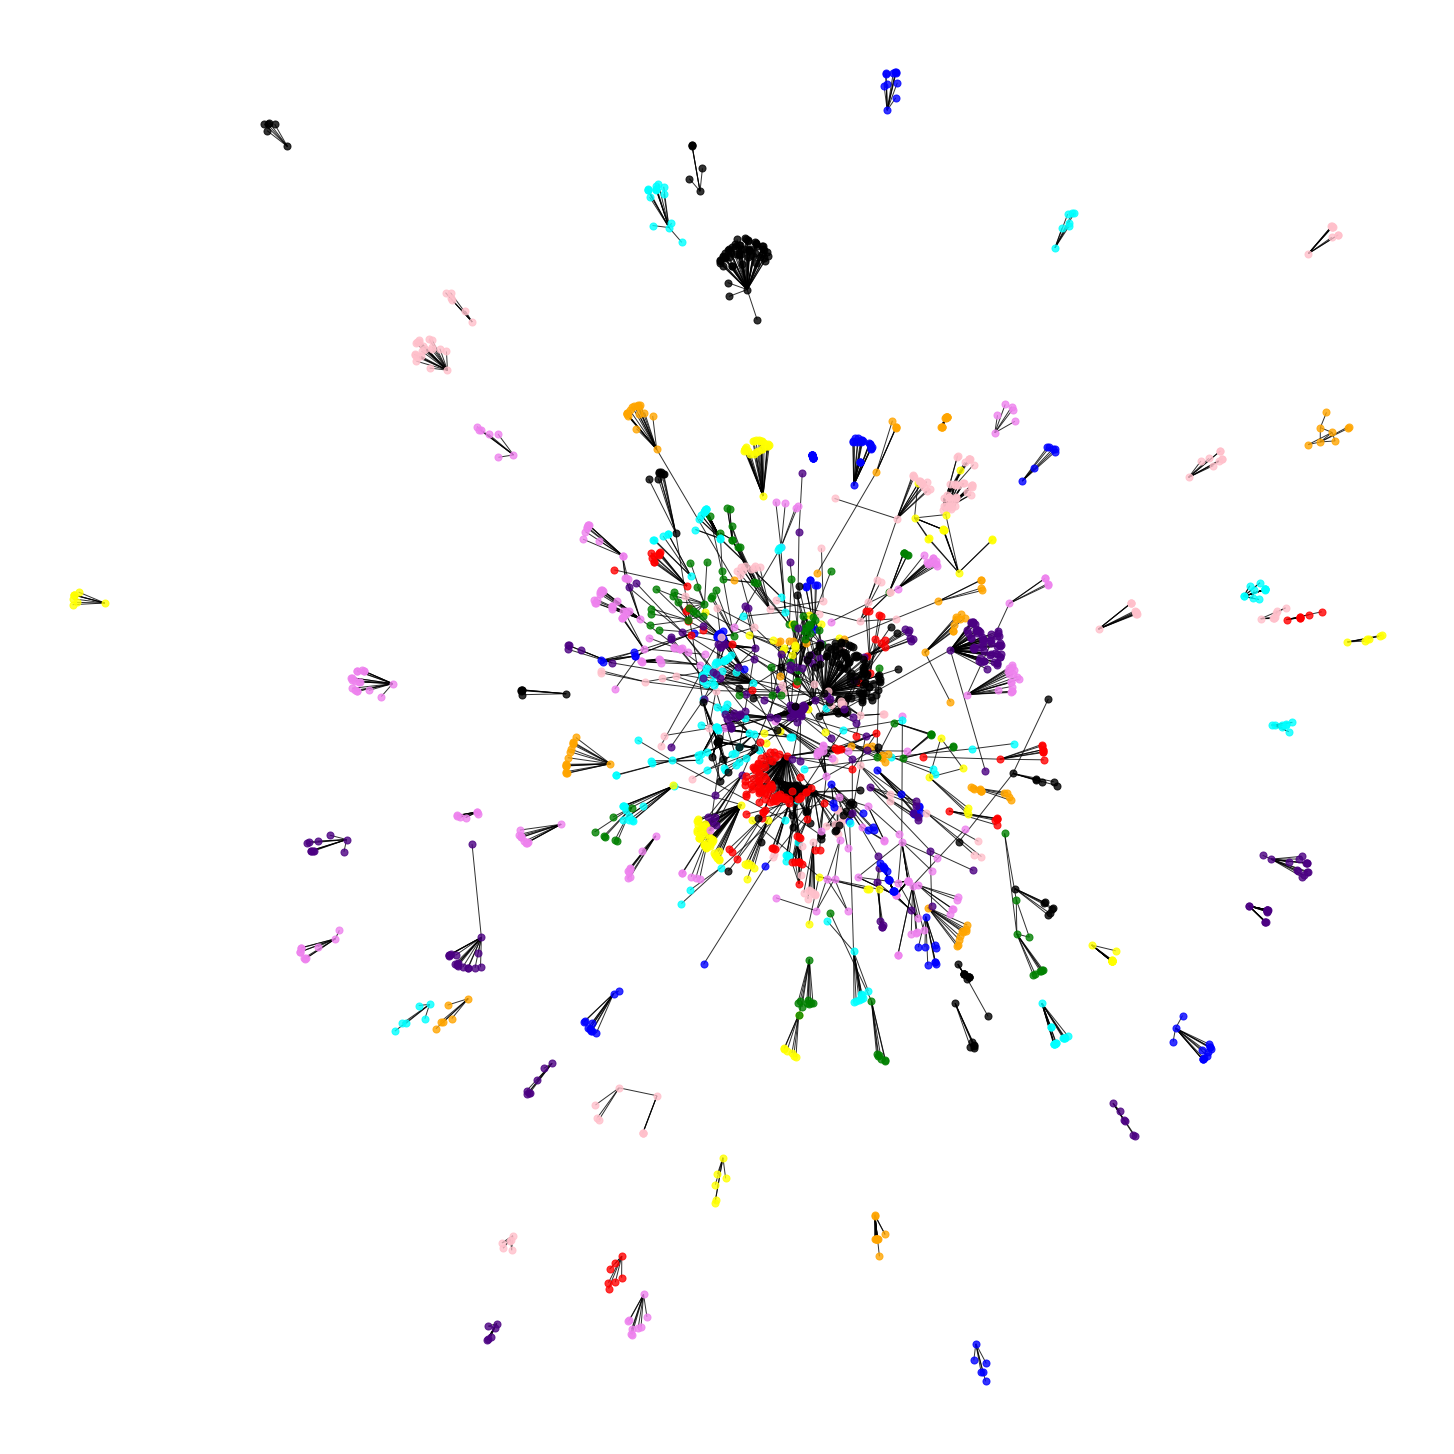

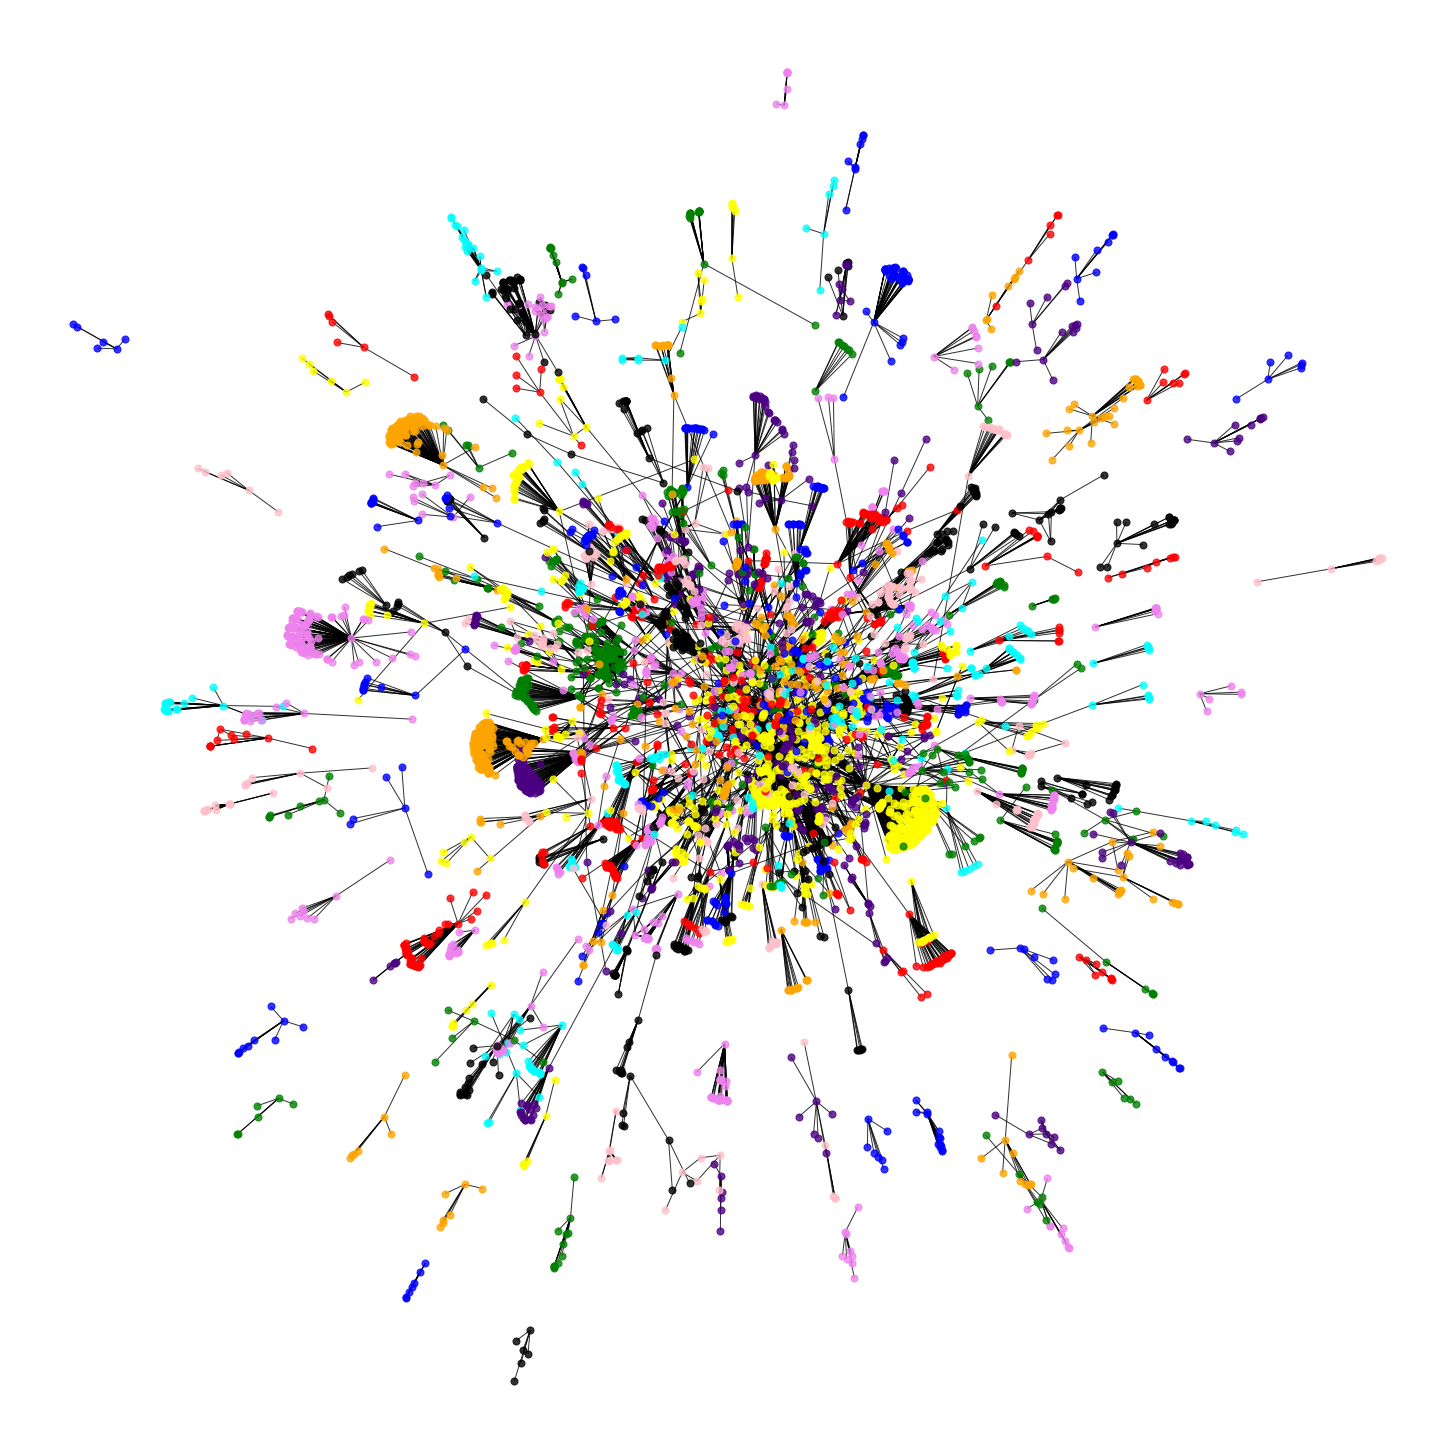

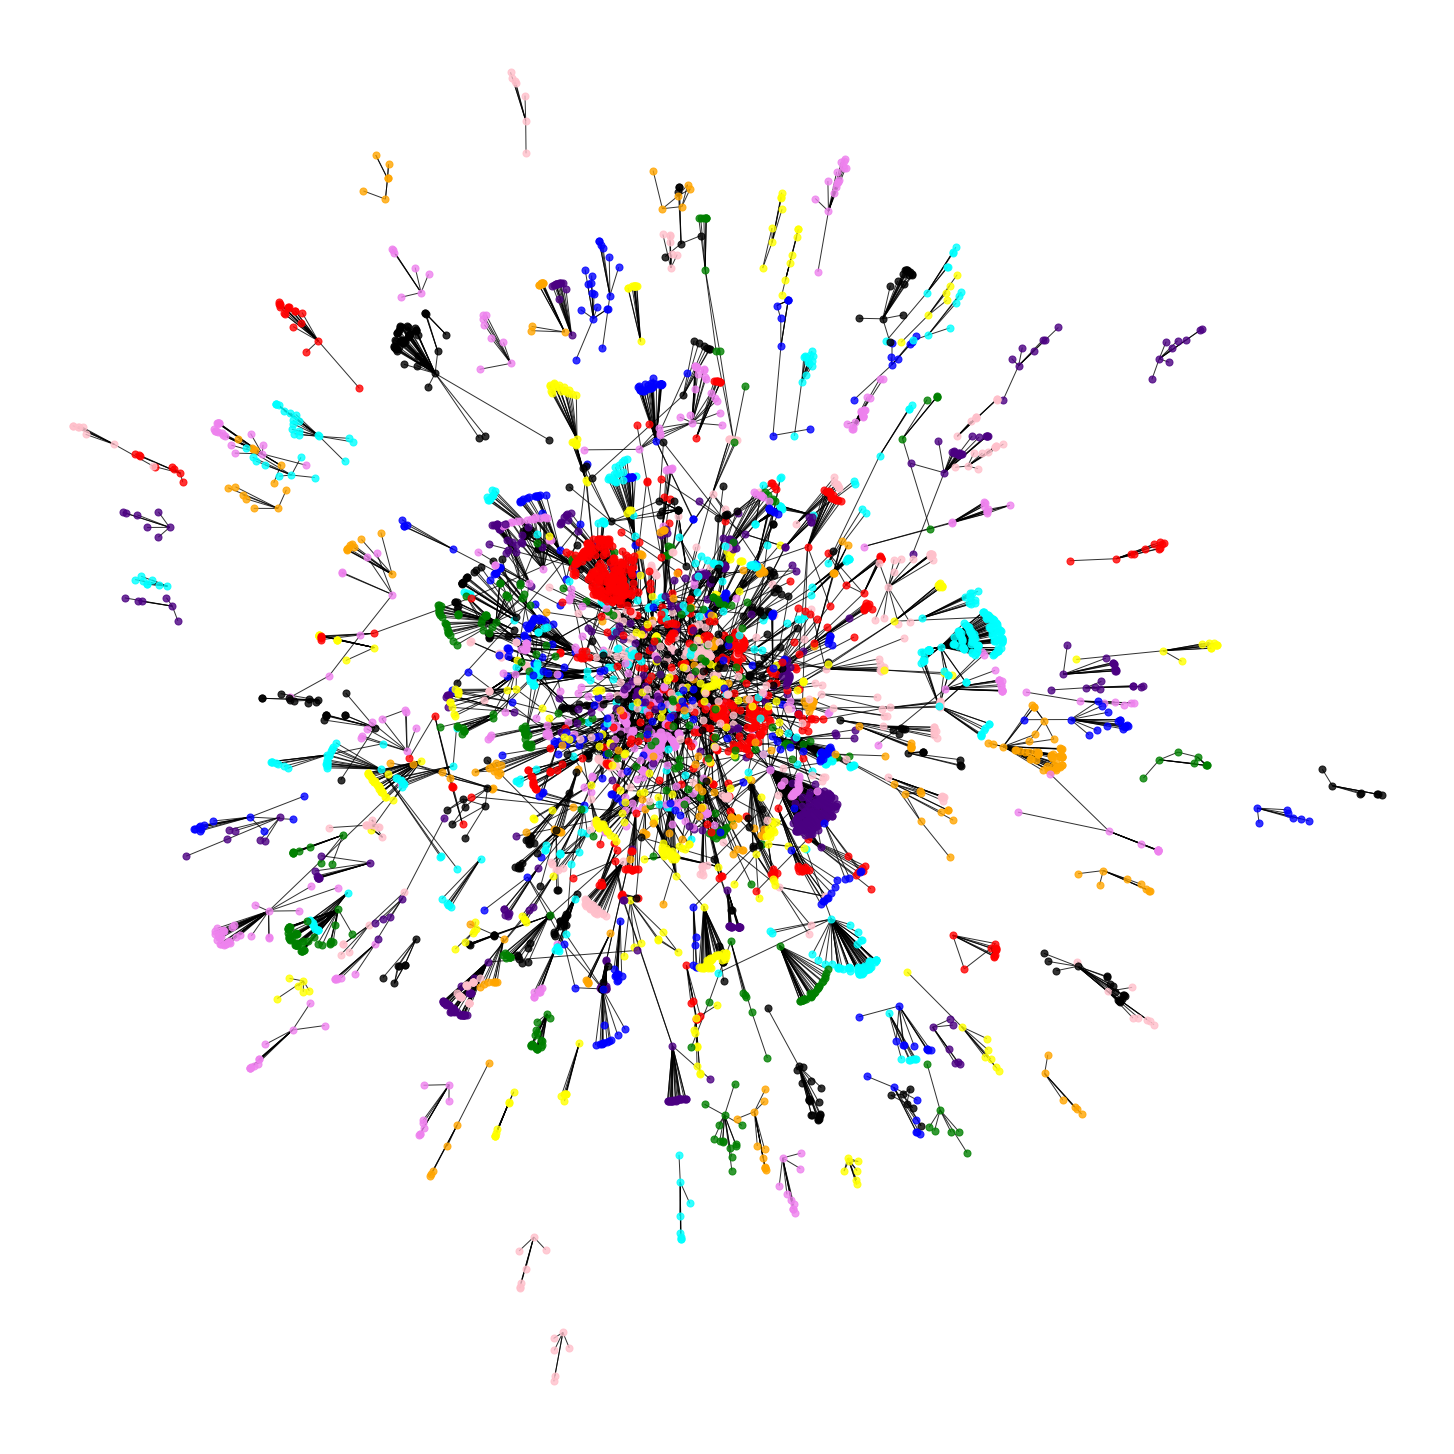

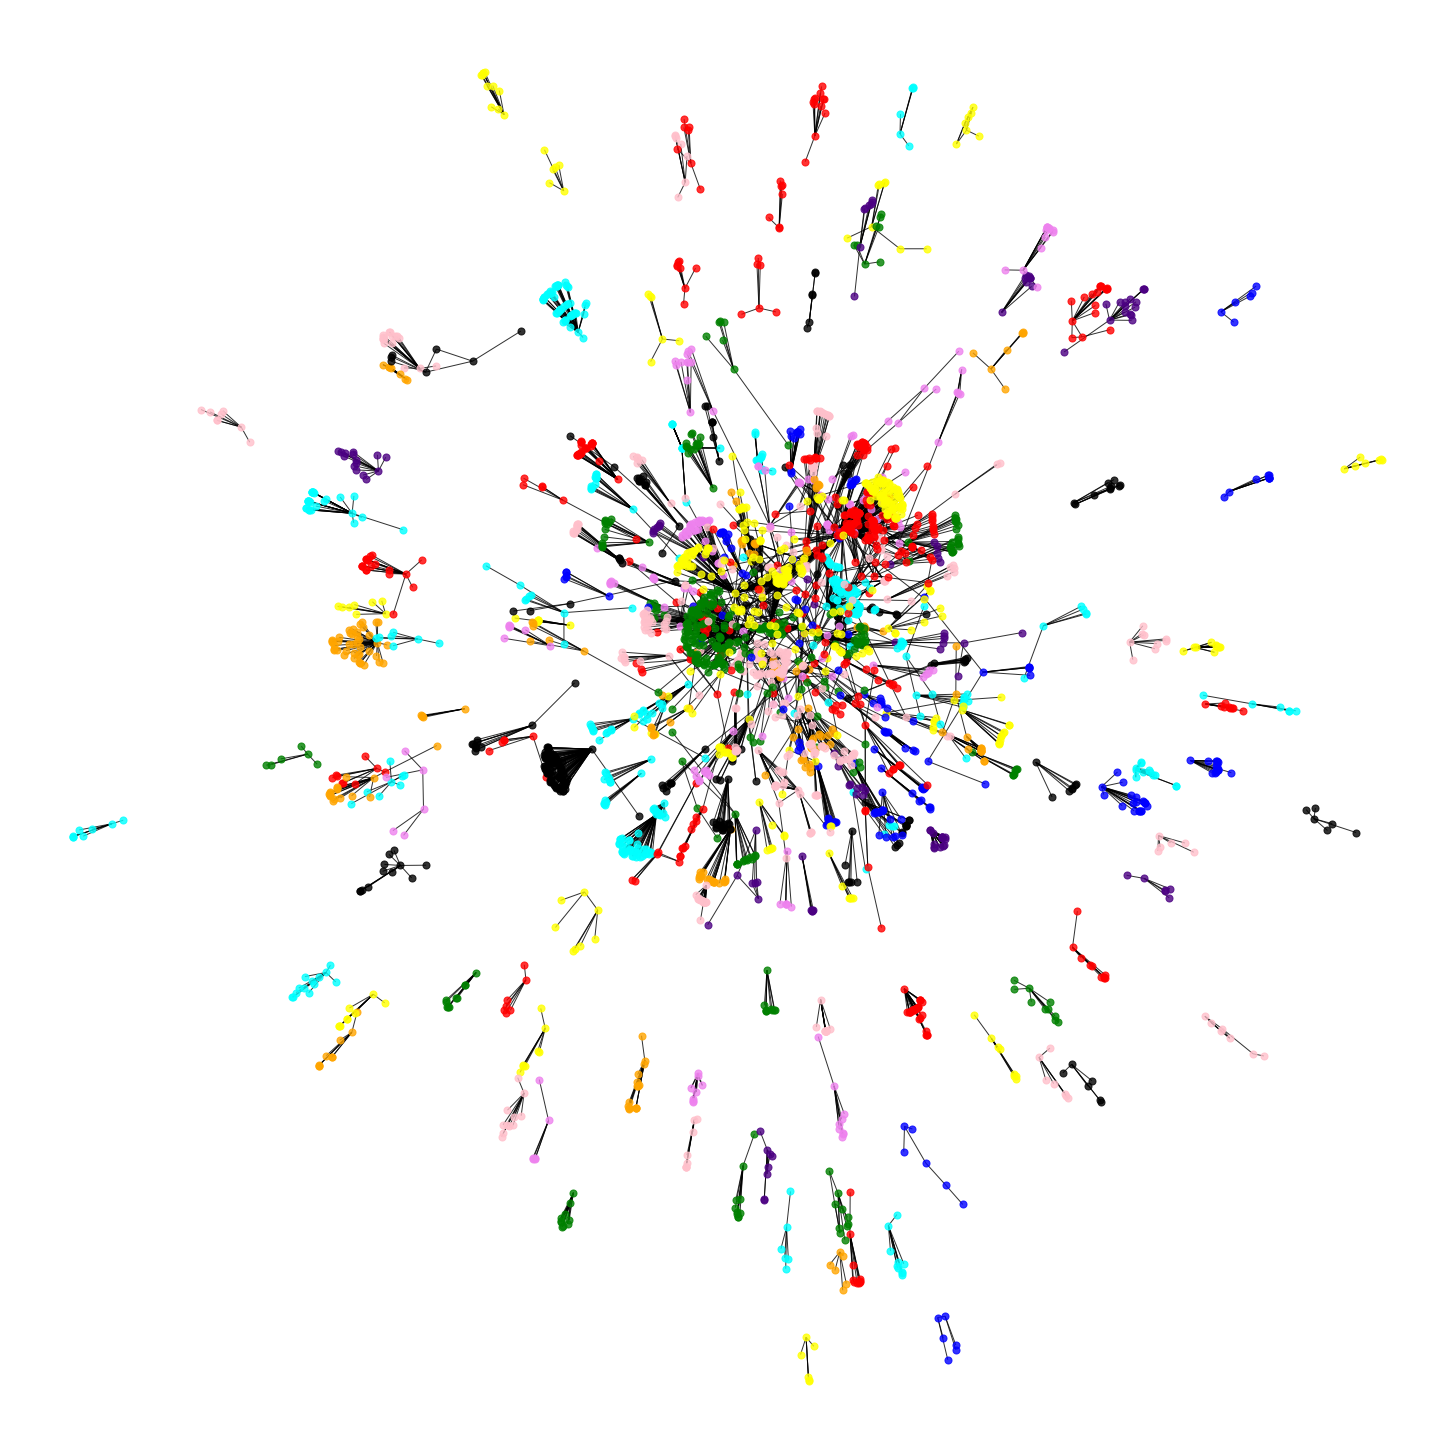

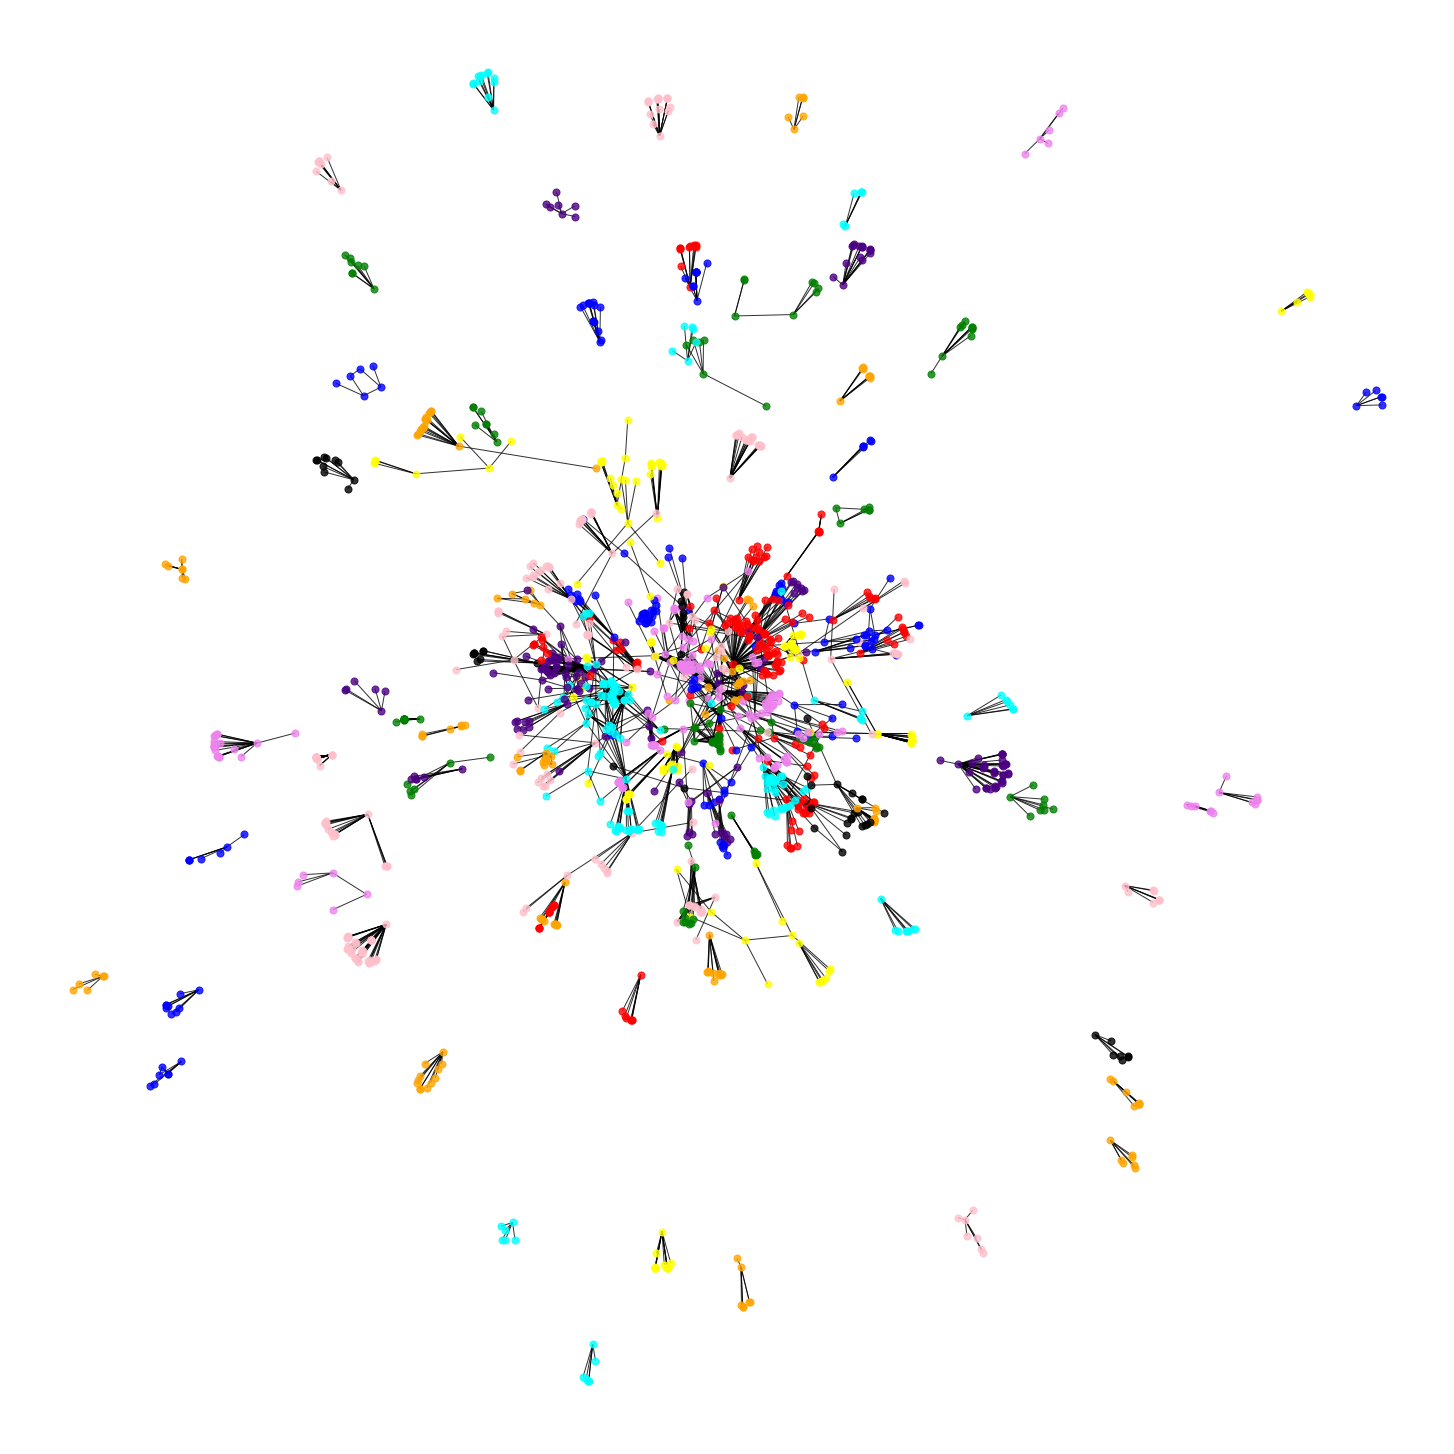

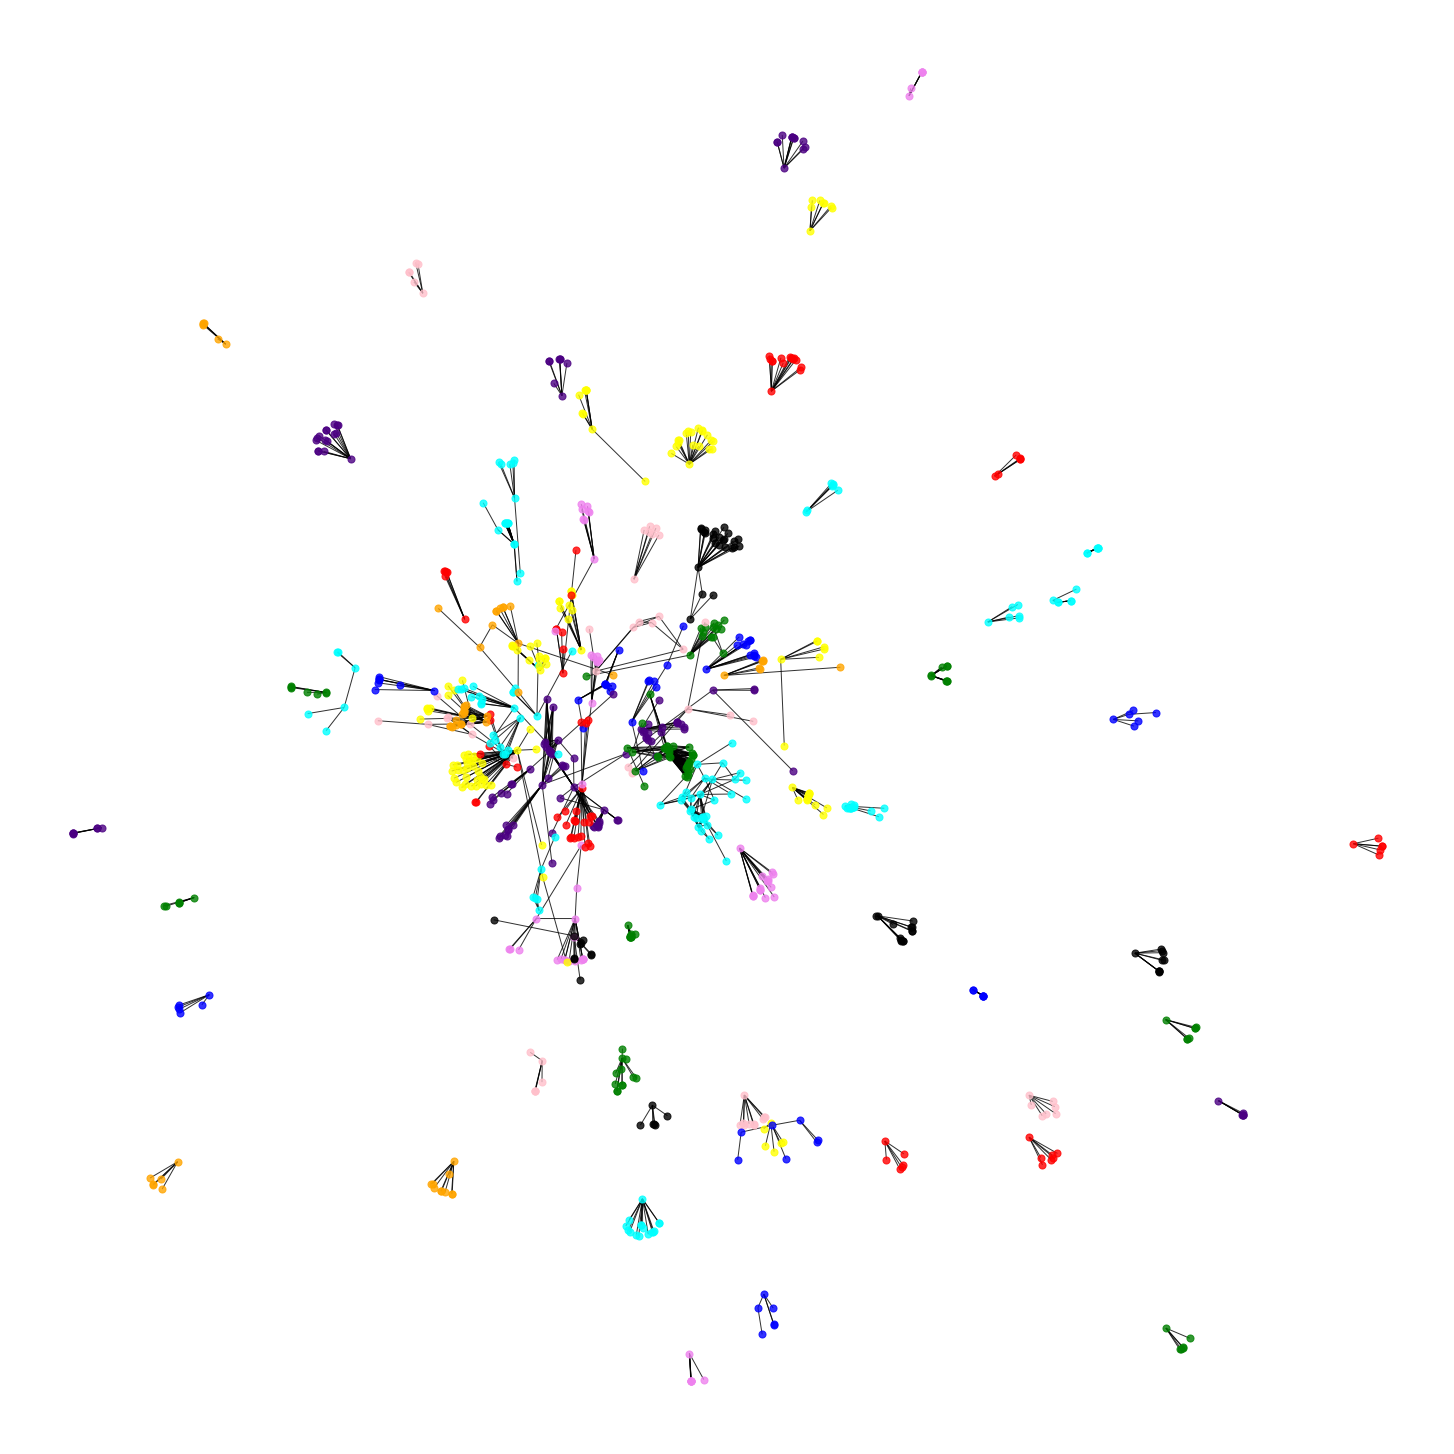

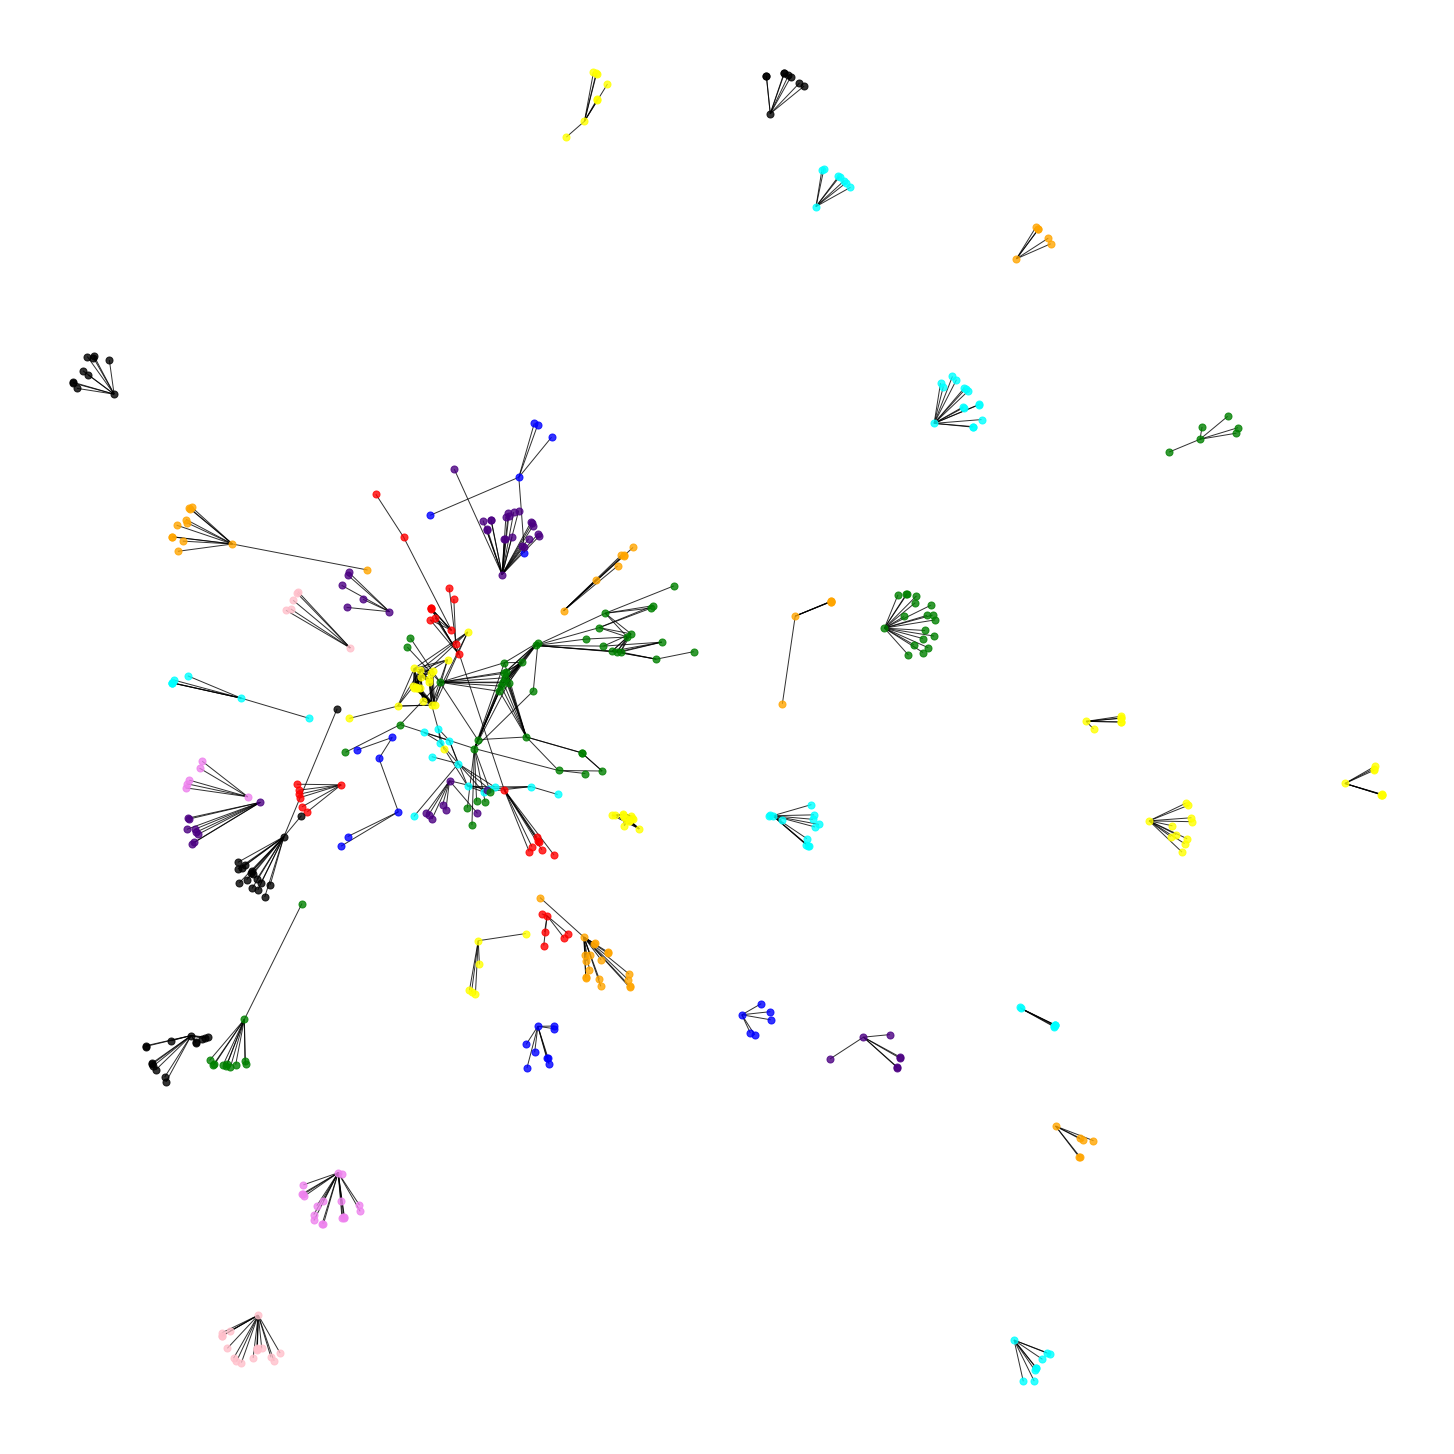

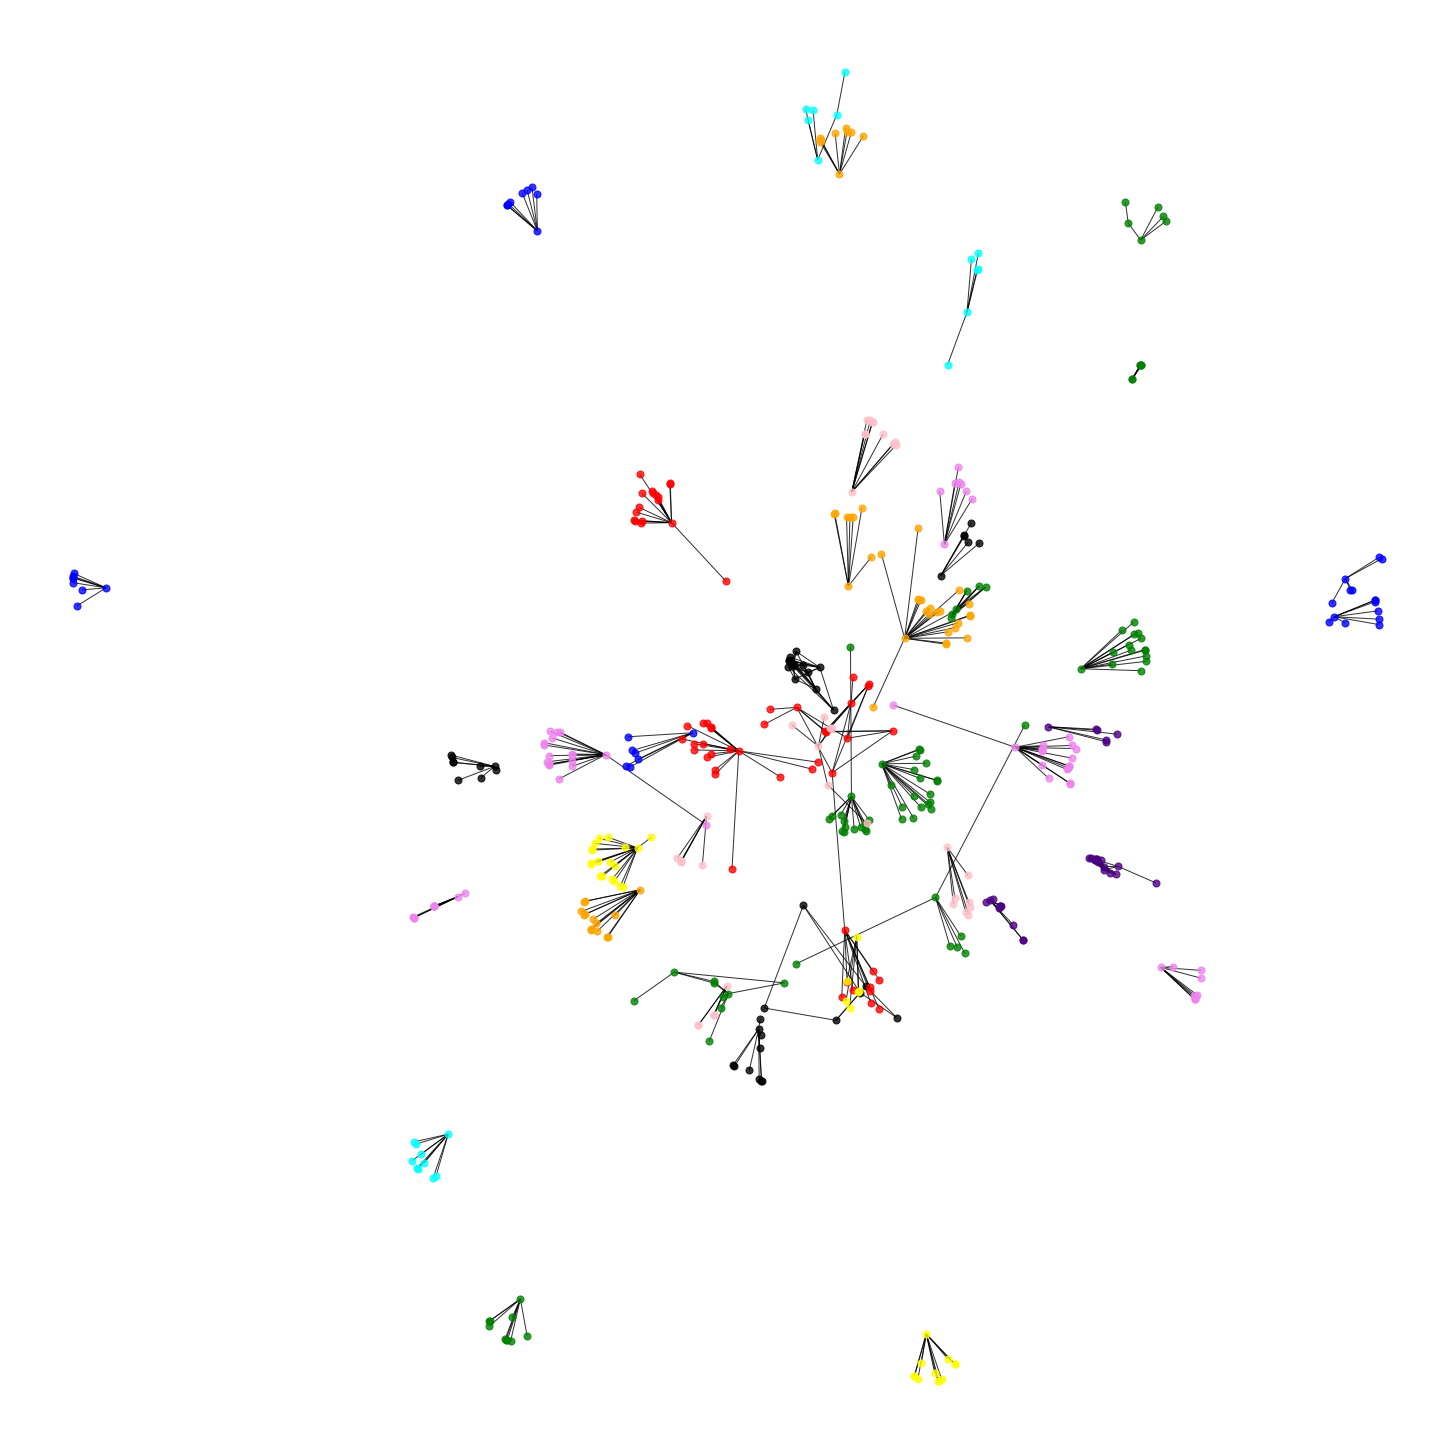

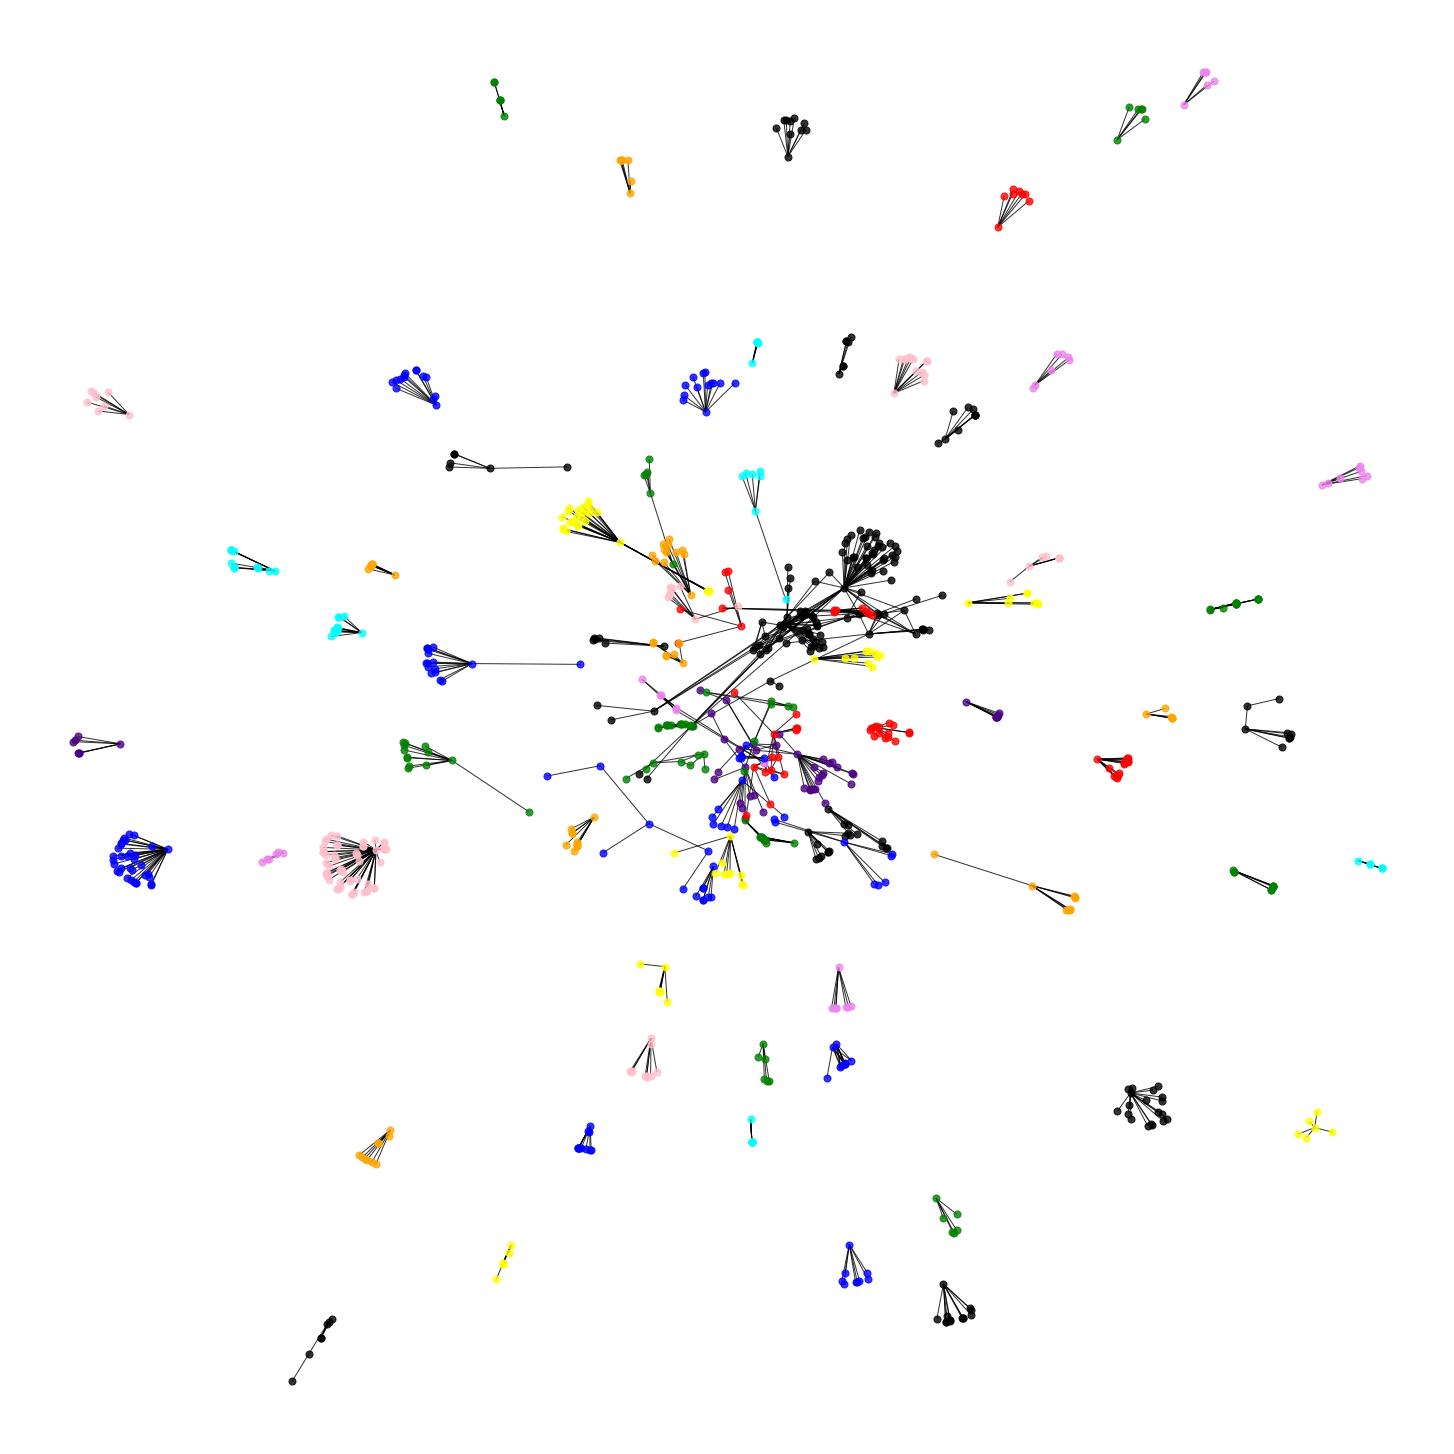

In [ ]:
while start_time <= end_time:
  hour_time = (datetime.strptime(start_time, '%m/%d/%y %H:%M:%S') + timedelta(hours=1)).strftime('%m/%d/%y %H:%M:%S')
  tweets_df = tweets_org_df[(tweets_org_df['created_date'] >= start_time) & (tweets_org_df['created_date'] <= hour_time)]


  tweets_df['final_text'] = tweets_df['retweeted_status']
  tweets_df.loc[tweets_df['final_text'].notna(), 'final_text'] = tweets_df['final_text'].loc[tweets_df['final_text'].notna()].apply(lambda x : x['full_text'])
  tweets_df.loc[tweets_df['retweeted_status'].isna(), 'final_text'] = tweets_df['full_text']


  tweets_df['final_entities'] = tweets_df['retweeted_status']
  tweets_df.loc[tweets_df['final_entities'].notna(), 'final_entities'] = tweets_df['final_entities'].loc[tweets_df['final_entities'].notna()].apply(lambda x : x['entities'])
  tweets_df.loc[tweets_df['retweeted_status'].isna(), 'final_entities'] = tweets_df['entities']


  tweets_handle, tweets_handle_1, tweets_hashtag = fill_df(tweets_df)


  user_mention_graph = nx.Graph()
  for index, tweet in tweets_handle.iterrows():
    interactions = get_interactions_usermention(tweet)
    for interaction in interactions:
        tweet_id, user_id, user_mention_id = interaction
        if user_mention_graph.has_edge(user_id,user_mention_id):
          user_mention_graph[user_id][user_mention_id]['weight'] += 1
        else:
          user_mention_graph.add_edge(user_id, user_mention_id,weight = 1)
        user_mention_graph.nodes[user_id]["name"] = user_id
        user_mention_graph.nodes[user_mention_id]["name"] = user_mention_id       


  user_mention_comu = list(nx.algorithms.community.label_propagation.label_propagation_communities(user_mention_graph))

  pos = nx.spring_layout(user_mention_graph,k=.01,iterations=20)
  plt.figure(figsize=(20,20))
  colors = ["violet", "black", "orange", "cyan", "blue", "green", "yellow", "indigo", "pink", "red"]
  for i in range(len(user_mention_comu)):
      graph = user_mention_comu[i]
      node_list = [node for node in graph]
      if len(node_list) > 5 :
        edge_list = list(user_mention_graph.subgraph(node_list).edges())
        nx.draw(user_mention_graph, pos, nodelist=node_list,edgelist = edge_list, node_color=colors[i%10], node_size=50, alpha=0.8)



  topic_com_cluster = []
  tweet_com_cluster = []
  stop_words = set(stopwords.words("english"))
  for i in range(len(user_mention_comu)): 
    #print(i)
    tweets_df_mentions = tweets_handle_1[tweets_handle_1['tweets_handle_user_id'].isin([node for node in user_mention_comu[i]])]
    tweets_df_mentions["final_text"] = tweets_df_mentions['final_text'].str.replace(r'http\S+', '')
    if len(tweets_df_mentions.index) > 5 :
      sklearn_tfidf = TfidfVectorizer(max_features=20000,stop_words=stop_words)
      text_tfidf = sklearn_tfidf.fit_transform(tweets_df_mentions["final_text"])
      dbscan = DBSCAN(metric=cosine_distances,eps =.95)
      dbscan.fit(text_tfidf)
      clusters = dbscan.labels_.tolist()
      
      tweet_node_id = list(tweets_handle_1[tweets_handle_1['tweets_handle_user_id'].isin([node for node in user_mention_comu[i]])]['tweet_id'])
      tweets_df_text =  tweets_df_mentions['final_text'].tolist()
      topic_com_data_1 = pd.DataFrame({"cluster_label":clusters,"tweet_node_id":tweet_node_id,"tweets_df_text":tweets_df_text})
      topic_com_data = topic_com_data_1.groupby('cluster_label').agg({'tweets_df_text':lambda x: list(x),'tweet_node_id':lambda x: list(x)})#.reset_index()
      if -1 in topic_com_data.index :
        topic_com_data = topic_com_data.drop(-1)
      for j in range(len(topic_com_data)):
        topic_com_cluster.append(topic_com_data.loc[j,'tweets_df_text'])
        tweet_com_cluster.append(topic_com_data.loc[j]['tweet_node_id'])

  topic_evn_cluster.append(topic_com_cluster)
  start_time = hour_time


In [ ]:
topic_evn_cluster

[[['. @AtishiAAP is making long speeches opposing #FarmersBill . Why @TimesNow reporter is not asking her on why @AamAadmiParty has passed the bill already in line with this bill and what is her view on the demand for free #stubbleburning of #Farmers? @navikakumar',
   '. @AtishiAAP is making long speeches opposing #FarmersBill . Why @TimesNow reporter is not asking her on why @AamAadmiParty has passed the bill already in line with this bill and what is her view on the demand for free #stubbleburning of #Farmers? @navikakumar',
   'Interesting. @AtishiAAP lies blatantly on the channel. I hope @navikakumar does not let her get away with it. It is not important whether it is of import or not.',
   'Interesting. @AtishiAAP lies blatantly on the channel. I hope @navikakumar does not let her get away with it. It is not important whether it is of import or not.',
   'Interesting. @AtishiAAP lies blatantly on the channel. I hope @navikakumar does not let her get away with it. It is not import

In [ ]:
pair_ls = {}
pair_ls_cont = {}
cnt = 0
for j in range(0,len(topic_evn_cluster)-1) :
  if j ==0 :
    event_dict_ti ={}
    event_dict_ls_ti ={}
    for i in range(len(topic_evn_cluster[j])) :
      str1 = "".join(topic_evn_cluster[j][i])
      event_dict_ti.update({cnt : str1})
      event_dict_ls_ti.update({cnt : topic_evn_cluster[j][i]})
      cnt +=1 
  else :
    event_dict_ti = event_dict_tj.copy()
    event_dict_ls_ti = event_dict_ls_tj.copy()
    #print("1",event_dict_t1)
    
  event_dict_tj ={}
  event_dict_ls_tj ={}
  for i in range(len(topic_evn_cluster[j+1])) :
    
    str1 = "".join(topic_evn_cluster[j+1][i])
    #final_clus_ls.append(str1)
    event_dict_tj.update({cnt : str1})
    event_dict_ls_tj.update({cnt : topic_evn_cluster[j+1][i]})
    cnt +=1
  #print("2",event_dict_t2)


  for name_i, name_val_i in event_dict_ti.items():
    for name_j, name_val_j in event_dict_tj.items():
      sklearn_tfidf = TfidfVectorizer(max_features=20000, stop_words='english')
      text_tfidf_com = sklearn_tfidf.fit_transform([name_val_i, name_val_j])
      dist = cosine_similarity(text_tfidf_com)
      for i in range(len(dist)):
        dist[i][i] = 0
      ls = np.argwhere(dist > .5)
      ls.sort()
      #print(len(name_val_i))
      skt = set(tuple(i) for i in ls)
      if len(skt):
        pair_ls.update({(name_i,len(event_dict_ls_ti.get(name_i))):(name_j,len(event_dict_ls_tj.get(name_j)))})
        pair_ls_cont.update({(name_i,len(event_dict_ls_ti.get(name_i))):(event_dict_ls_ti.get(name_i), event_dict_ls_tj.get(name_j))})

In [ ]:
evn_set = set()
root = set()
evn_ls = []
evn_ls_cont = []
cnt = 0
for i in range(len(pair_ls)):
  key = list(pair_ls.keys())[i]
  val = list(pair_ls.values())[i]
  if key in evn_set:
    continue
  else :
    # root.add(key)
    evn_ls.append([key[1]])
    evn_ls_cont.append([list(pair_ls_cont.values())[i]])
  #print("chain for key ", key)
  while val in pair_ls.keys():
      #print(val)
      evn_set.add(val)
      evn_ls[cnt].append(val[1])
      evn_ls_cont[cnt].append(list(pair_ls_cont.values())[i])
      val = pair_ls.get(val)
  #print(val)
  evn_ls[cnt].append(val[1])
  evn_ls_cont[cnt].append(list(pair_ls_cont.values())[i])
  #evn_ls[cnt].append(val[0])  
  cnt +=1  

In [ ]:
evn_ls.sort( key=len, reverse=True) 
evn_ls_cont.sort( key=len, reverse=True) 

In [ ]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        #print("\nTopic #%d:" % topic_idx)
        #print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        return " ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])

In [ ]:
cluster_lda = []
cluster_topic_size = []
for topic in evn_ls_cont:    
    #number_topics = len(clusters)
    #print(topic)
    str = ' '.join((" ".join(filter(lambda x: x[0]!='@', x.split()))) for x in topic[0][0])
    sklearn_tfidf_1 = TfidfVectorizer(max_features=20000,stop_words=stop_words)
    text_tfidf_1 = sklearn_tfidf_1.fit_transform([str])
    number_words = 6
    # Create and fit the LDA model
    lda = LDA(n_components=1, n_jobs=-1)
    lda.fit(text_tfidf_1)

    #print("Topics found via LDA:")
    topic = print_topics(lda, sklearn_tfidf_1, number_words)
    cluster_lda.append(topic)
    cluster_topic_size.append(len(topic))

In [ ]:
cluster_lda

['writes took abohar age away bunch',
 'protests indian farmers seen concern rights',
 'tapasya years 12 rashami fans see',
 'tapasya years 12 thanks thread makes',
 'indian msp protests farmers india wto',
 'goni wewantalyback gets tough hu bhai',
 'act manifesto essential commodities 2019 amp',
 'vs old noodle monk indian fighters',
 'watch voter analyse chunavikasrat december doubt',
 'protests weeks kong concern countries defending',
 'ji amp thank support love battle',
 'mobile number dm kindly link via',
 'target strikes ashm atmanirbharbharat bay bengal',
 'love sidnaaz never sidharthshukla many shona',
 'maibhifarmer farmer lockdown khan makes spent',
 'countries restrictions till fly air arabia',
 'farmer yet wheat 20 agitation agri',
 'yes north india huge demand',
 'unsung unfortunately agency appreciation border camping',
 'amp sidnaaz shonashonawithsidnaaz shonashona loved backdrop',
 'vote tvpersonalitywithrajbaddhan vishalvashishtha marjawan mein ishq',
 'eth giveaway do

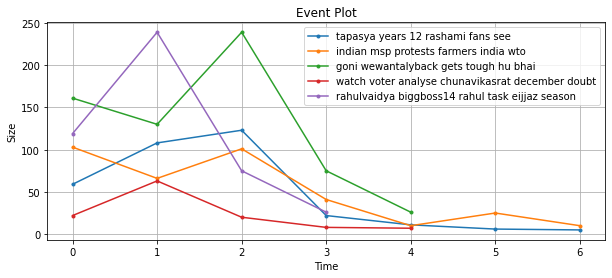

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10,4))
plt.plot(range(len(evn_ls[2])), evn_ls[2], marker='.', label=cluster_lda[2])
#plt.plot(range(len(evn_ls[1])), evn_ls[1], marker='.', label='SVM')
plt.plot(range(len(evn_ls[4])), evn_ls[4], marker='.', label=cluster_lda[4])
plt.plot(range(len(evn_ls[5])), evn_ls[5], marker='.', label=cluster_lda[5])
plt.plot(range(len(evn_ls[8])), evn_ls[8], marker='.', label=cluster_lda[8])
plt.plot(range(len(evn_ls[24])), evn_ls[24], marker='.', label=cluster_lda[24])
# Title
plt.title('Event Plot (Delhi)')
# Axis labels
plt.xlabel('Time (in hours)')
plt.ylabel('Size (number of posts in one timeslice)')
# Show legend
# Show legend
plt.legend() #
plt.grid() 
# Show plot
plt.show()

In [ ]:
with open('/content/pickleFiles/evn_ls.pickle', 'rb') as f:
    mumbai_evn_ls = pickle.load(f)

In [ ]:
with open('/content/pickleFiles/evn_ls_cont.pickle', 'rb') as f:
    mumbai_evn_ls_cont = pickle.load(f)

In [ ]:
with open('/content/pickleFiles/cluster_lda.pickle', 'rb') as f:
    mumbai_cluster_lda = pickle.load(f)

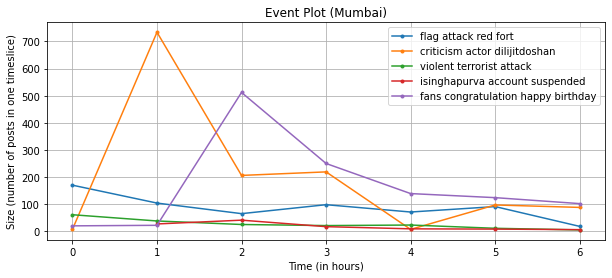

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10,4))
plt.plot(range(len(mumbai_evn_ls[2])), mumbai_evn_ls[2], marker='.', label=mumbai_cluster_lda[2])
#plt.plot(range(len(mumbai_evn_ls[1])), evn_ls[1], marker='.', label='SVM')
plt.plot(range(len(mumbai_evn_ls[4])), mumbai_evn_ls[4], marker='.', label=mumbai_cluster_lda[4])
plt.plot(range(len(mumbai_evn_ls[5])), mumbai_evn_ls[5], marker='.', label=mumbai_cluster_lda[5])
plt.plot(range(len(mumbai_evn_ls[8])), mumbai_evn_ls[8], marker='.', label=mumbai_cluster_lda[8])
plt.plot(range(len(mumbai_evn_ls[24])), mumbai_evn_ls[24], marker='.', label=mumbai_cluster_lda[24])
# Title
plt.title('Event Plot (Mumbai)')
# Axis labels
plt.xlabel('Time (in hours)')
plt.ylabel('Size (number of posts in one timeslice)')
# Show legend
# Show legend
plt.legend() #
plt.grid() 
# Show plot
plt.show()

In [ ]:
with open('/content/pickleFiles/bglr_evn_ls.pickle', 'rb') as f:
    bglr_evn_ls = pickle.load(f)

In [ ]:
with open('/content/pickleFiles/bglr_evn_ls_cont.pickle', 'rb') as f:
    bglr_evn_ls_cont = pickle.load(f)

In [ ]:
with open('/content/pickleFiles/bglr_cluster_lda.pickle', 'rb') as f:
    bglr_cluster_lda = pickle.load(f)

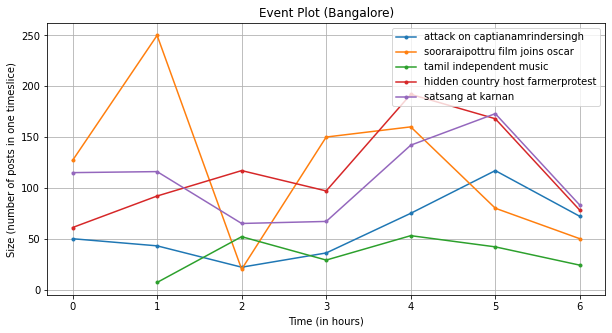

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10,4))
plt.plot(range(len(bglr_evn_ls[2])), bglr_evn_ls[2], marker='.', label=bglr_cluster_lda[2])
#plt.plot(range(len(bglr_evn_ls[1])), evn_ls[1], marker='.', label='SVM')
plt.plot(range(len(bglr_evn_ls[4])), bglr_evn_ls[4], marker='.', label=bglr_cluster_lda[4])
plt.plot(range(len(bglr_evn_ls[5])), bglr_evn_ls[5], marker='.', label=bglr_cluster_lda[5])
plt.plot(range(len(bglr_evn_ls[8])), bglr_evn_ls[8], marker='.', label=bglr_cluster_lda[8])
plt.plot(range(len(bglr_evn_ls[24])), bglr_evn_ls[24], marker='.', label=bglr_cluster_lda[24])
# Title
plt.title('Event Plot (Bangalore)')
# Axis labels
plt.xlabel('Time (in hours)')
plt.ylabel('Size (number of posts in one timeslice)')
# Show legend
# Show legend
plt.legend() #
plt.grid() 
# Show plot
plt.show()